In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/home/jianyan/.conda/envs/trade-bot/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


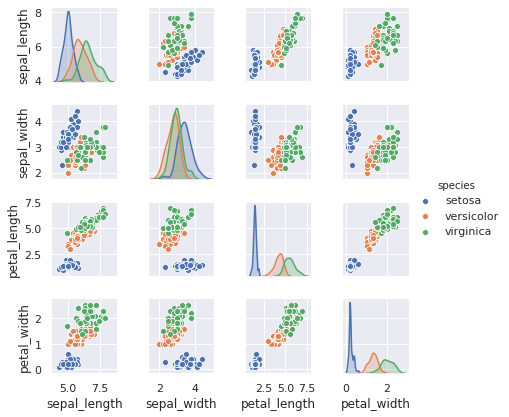

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

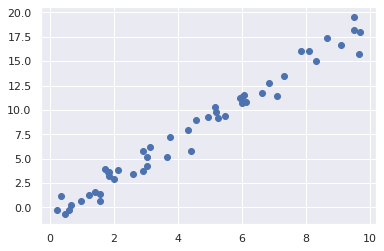

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

# Example: Linear regression with SK-learn model

## Process:
1. choose model
2. choose hyperparameters
3. arrange data into a features matrix and target vector
4. fit model to data
5. predict labels for unknown data

## 1. choose model

In [6]:
from sklearn.linear_model import LinearRegression

## 2. hyperparameters

Hyperparameters: important choices that must be made once the model class is selected
* fit for offfset?
* model be normalized?
* preprocess our features to add model flexibility?

etc

In SK-learn, we choose hyperparameters by passing values at model instantiation

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 3. arange data into a features matrix and target vector

In [8]:
X = x[:, np.newaxis]
X.shape
# x if feature matrix, y is target array

(50, 1)

## 4. fit model with your data

In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# all model parameters learned during fit() process have trailing
# underscores
model.coef_

array([1.9776566])

In [11]:
model.intercept_

-0.9033107255311164

## 5. predict labels for unknown data
* new data: grid of x values
* predicts: y values

In [12]:
xfit = np.linspace(-1, 11) # default num=50

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

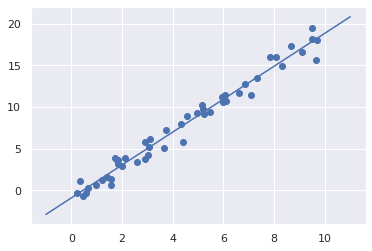

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

# Supervised learning example: Iris classification

## 1. split data into training set and testing set

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

## 2. predict labels

In [21]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. perdict on new data

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

# Unsupervised learning example: Iris dimonsonality

In [32]:
from sklearn.decomposition import PCA   # same four steps
model = PCA(n_components=2)
model.fit(X_iris)  # Note: y is not specified
X_2D = model.transform(X_iris)

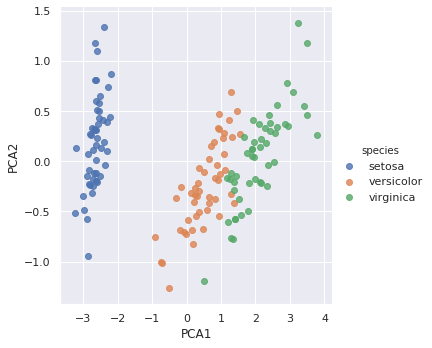

In [33]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

# Unsupervised learning: Iris clustering

In [35]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3,
            covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

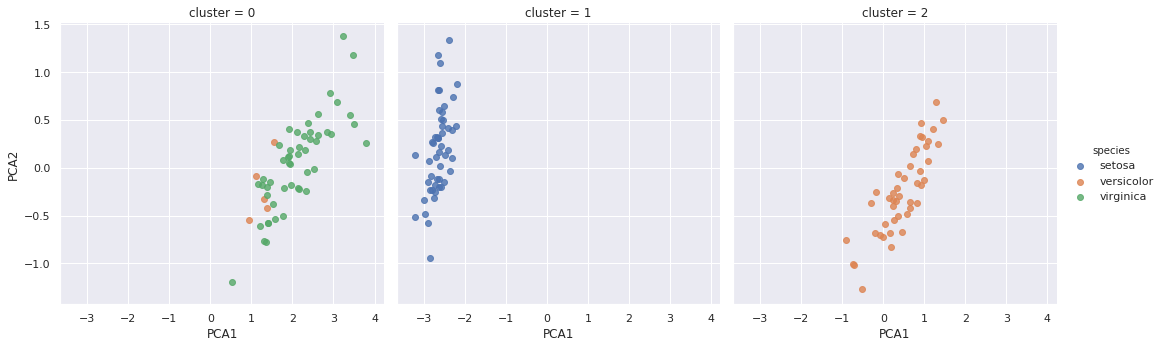

In [38]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', 
          col='cluster', fit_reg=False)

# Application: Exploring Handwritten Digits

In [40]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

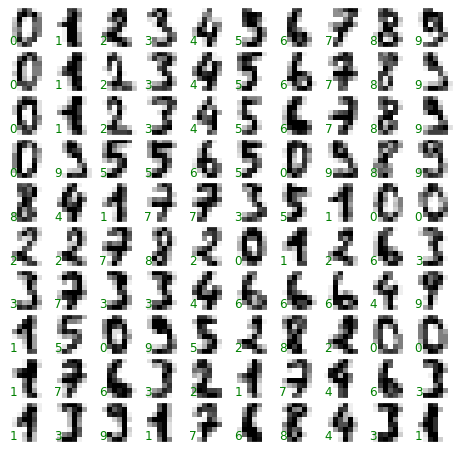

In [42]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [43]:
X = digits.data
X.shape

(1797, 64)

In [44]:
y = digits.target
y.shape

(1797,)

## Unsupervised learning: Dimensionality reduction

In [46]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

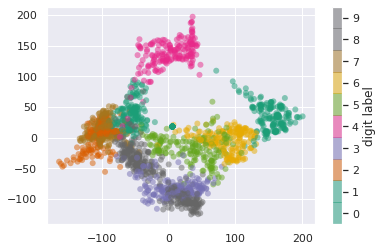

In [51]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
           edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('Dark2', 10))
plt.colorbar(label='digit label', ticks=range(10))

plt.clim(-0.5, 9.5);

## Classification on digits

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [54]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

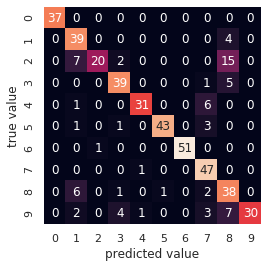

In [56]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

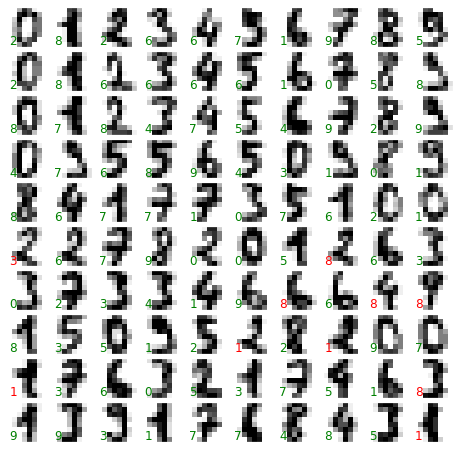

In [60]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')